In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

# scTRS tools
import scdrs.util as util
import scdrs.data_loader as dl
import scdrs.method as md

# autoreload
%load_ext autoreload
%autoreload 2

In [5]:
OUT_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/results/fig_schema'
DATA_PATH='/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'
adata=dl.load_tms_processed(DATA_PATH, data_name='facs', tissue='MAT')['MAT']
fpath=DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_1000/PASS_Rheumatoid_Arthritis.full_score.gz'
df_score=pd.read_csv(fpath, sep='\t', index_col=0)

# load_tms_processed: load facs data, tissue=[MAT]


/n/holystore01/LABS/price_lab/Users/mjzhang/myenv_gf/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/n/holystore01/LABS/price_lab/Users/mjzhang/myenv_gf/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


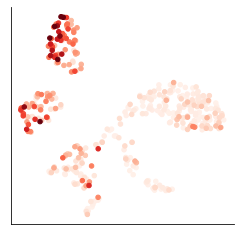

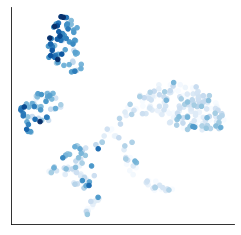

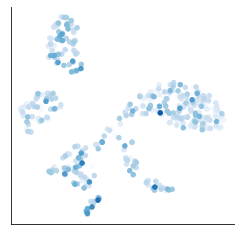

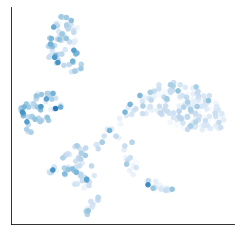

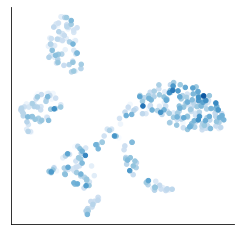

In [7]:
df_plot = pd.DataFrame(index=adata.obs_names, data={'UMAP1':adata.obsm['X_umap'][:,0],
                                                    'UMAP2':adata.obsm['X_umap'][:,1]})
df_plot = df_plot.loc[np.random.choice(df_plot.index, size=400, replace=False)].copy()
df_plot = df_plot.join(df_score)

# log10 p-value
term = 'nlog10_pval'
df_plot.sort_values(term, inplace=True)
plt.figure(figsize=[4,4])
ax = plt.subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(df_plot['UMAP1'], df_plot['UMAP2'], c=df_plot[term], cmap='Reds', s=20, vmin=-0.1, vmax=4)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig(OUT_PATH+'/umap_%s.svg'%term)
plt.show()

# Scores
vmax=np.quantile(df_plot['norm_score'], 0.99)
vmin=np.quantile(df_plot['norm_score'], 0.1)
for term in ['norm_score', 'ctrl_norm_score_0', 'ctrl_norm_score_1', 'ctrl_norm_score_2']:
    df_plot.sort_values(term, inplace=True)
    plt.figure(figsize=[4,4])
    ax = plt.subplot(1,1,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.scatter(df_plot['UMAP1'], df_plot['UMAP2'], c=df_plot[term], cmap='Blues', s=20, vmax=vmax, vmin=vmin)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig(OUT_PATH+'/umap_%s.svg'%term)
    plt.show()